Tarea multistep encoder-decoder

In [1]:
import pandas as pd
from numpy import array
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import hstack
from keras.layers.merge import concatenate

In [2]:
df=pd.read_csv("Daily_Demand_Forecasting_Orders.csv")

In [4]:
df.head()

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN


In [5]:
data = pd.DataFrame(df['Week of the month (first week'].str.split(';',13).tolist(),
                    columns = 
                    ['fourth','Day_of_the_week','Non-urgent-order',
                     'Urgent-order','OrderA','OrderB','OrderC','Fiscal','traffic-orders',
                     'Banking-orders-1','Banking-orders-2','Banking-orders-3','target'])

In [8]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [9]:
data.isnull().any()

fourth              False
Day_of_the_week     False
Non-urgent-order    False
Urgent-order        False
OrderA              False
OrderB              False
OrderC              False
Fiscal              False
traffic-orders      False
Banking-orders-1    False
Banking-orders-2    False
Banking-orders-3    False
target              False
dtype: bool

In [10]:
data.isnull().sum()

fourth              0
Day_of_the_week     0
Non-urgent-order    0
Urgent-order        0
OrderA              0
OrderB              0
OrderC              0
Fiscal              0
traffic-orders      0
Banking-orders-1    0
Banking-orders-2    0
Banking-orders-3    0
target              0
dtype: int64

In [11]:
data.dtypes

fourth              object
Day_of_the_week     object
Non-urgent-order    object
Urgent-order        object
OrderA              object
OrderB              object
OrderC              object
Fiscal              object
traffic-orders      object
Banking-orders-1    object
Banking-orders-2    object
Banking-orders-3    object
target              object
dtype: object

In [12]:
data = data.astype(float)

In [13]:
data.dtypes

fourth              float64
Day_of_the_week     float64
Non-urgent-order    float64
Urgent-order        float64
OrderA              float64
OrderB              float64
OrderC              float64
Fiscal              float64
traffic-orders      float64
Banking-orders-1    float64
Banking-orders-2    float64
Banking-orders-3    float64
target              float64
dtype: object

In [14]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411.0,20257.0,210.517


Data Set Information:

The database was collected during 60 days, this is a real database of a Brazilian company of large logistics.
Twelve predictive attributes and a target that is the total of orders for daily. treatment

*columns:
    
fourth or fifth week;
Day of the week (Monday to Friday);
Non-urgent order;
Urgent order;
Order type A;
Order type B;
Order type C;
Fiscal sector orders;
Orders from the traffic controller sector;
Banking orders (1);
Banking orders (2);
Banking orders (3);
Target (Total orders)

In [12]:
data.corr(method='spearman')

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
fourth,1.000000,-0.199278,0.305295,0.241157,0.330137,0.352502,-0.028597,-0.079508,-0.252482,0.336937,0.185186,-0.144296,0.305124
Day_of_the_week,-0.199278,1.000000,-0.420315,-0.579100,-0.117890,-0.400549,-0.513277,0.170226,-0.314024,-0.011089,-0.576349,0.088084,-0.454517
Non-urgent-order,0.305295,-0.420315,1.000000,0.479800,0.496749,0.801500,0.653626,-0.050380,0.109586,0.682356,0.732759,0.063851,0.865518
Urgent-order,0.241157,-0.579100,0.479800,1.000000,0.517422,0.580495,0.621506,-0.192920,0.117977,0.264296,0.560600,-0.061851,0.750320
OrderA,0.330137,-0.117890,0.496749,0.517422,1.000000,0.448902,0.202334,0.063674,-0.184107,0.585274,0.306696,0.069408,0.558099
OrderB,0.352502,-0.400549,0.801500,0.580495,0.448902,1.000000,0.410058,-0.000056,-0.041623,0.580661,0.741539,0.011892,0.892192
OrderC,-0.028597,-0.513277,0.653626,0.621506,0.202334,0.410058,1.000000,-0.129247,0.358488,0.278022,0.546430,0.024340,0.698972
Fiscal,-0.079508,0.170226,-0.050380,-0.192920,0.063674,-0.000056,-0.129247,1.000000,-0.055742,0.020498,-0.162089,0.391594,-0.018264
traffic-orders,-0.252482,-0.314024,0.109586,0.117977,-0.184107,-0.041623,0.358488,-0.055742,1.000000,-0.265907,0.125590,0.239066,0.046346
Banking-orders-1,0.336937,-0.011089,0.682356,0.264296,0.585274,0.580661,0.278022,0.020498,-0.265907,1.000000,0.247513,0.141706,0.588108


In [ ]:
#target con order B estan algo correlacionados

In [15]:
def split_sequence_multistep(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
def split_sequence_multistep_multivar(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs-1
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix-1:out_end,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [13]:
arrayX=data[['OrderB']]
#arrayX

In [14]:

from numpy import array
arrayX=array(arrayX)

In [17]:
n_steps,n_steps_out=3,2
X_enco_deco,y_enco_deco=split_sequence_multistep(arrayX,n_steps,n_steps_out)

In [24]:
#y_enco_deco
n_features=1

X_enco_deco=X_enco_deco.reshape((X_enco_deco.shape[0],X_enco_deco.shape[1],n_features))
y_enco_deco=y_enco_deco.reshape((y_enco_deco.shape[0],y_enco_deco.shape[1],n_features))

In [26]:
from keras.layers import RepeatVector
from keras.layers import LSTM
model_enco_deco=Sequential()
#encoder:
model_enco_deco.add(LSTM(80,activation='relu',input_shape=(n_steps,n_features)))
#repetir el vector d contexto
model_enco_deco.add(RepeatVector(n_steps_out))


In [37]:
#decoder:
model_enco_deco.add(LSTM(150,activation='relu',return_sequences=True))

In [38]:
from keras.layers import TimeDistributed

model_enco_deco.add(TimeDistributed(Dense(1)))

In [50]:
model_enco_deco.compile(optimizer='adam',loss='mse')
history=model_enco_deco.fit(X_enco_deco,y_enco_deco,epochs=800)

Epoch 1/800
2/2 [==============================] - 0s 4ms/step - loss: 1481.4464
Epoch 2/800
2/2 [==============================] - 0s 4ms/step - loss: 2118.2617
Epoch 3/800
2/2 [==============================] - 0s 4ms/step - loss: 1423.5990
Epoch 4/800
2/2 [==============================] - 0s 4ms/step - loss: 1206.2760
Epoch 5/800
2/2 [==============================] - 0s 4ms/step - loss: 897.7191
Epoch 6/800
2/2 [==============================] - 0s 4ms/step - loss: 978.6672
Epoch 7/800
2/2 [==============================] - 0s 3ms/step - loss: 822.2088
Epoch 8/800
2/2 [==============================] - 0s 5ms/step - loss: 612.8389
Epoch 9/800
2/2 [==============================] - 0s 4ms/step - loss: 590.1946
Epoch 10/800
2/2 [==============================] - 0s 5ms/step - loss: 623.1037
Epoch 11/800
2/2 [==============================] - 0s 4ms/step - loss: 575.8854
Epoch 12/800
2/2 [==============================] - 0s 4ms/step - loss: 525.9117
Epoch 13/800
2/2 [===============

In [51]:
X_enco_deco[0]

array([[175.586],
       [ 56.037],
       [ 25.125]])

In [52]:
x_test=X_enco_deco[0]

In [53]:
x_test=x_test.reshape((1,n_steps,n_features))

In [54]:
y_test=model_enco_deco.predict(x_test)

In [55]:
y_test

array([[[112.81259 ],
        [ 56.196815]]], dtype=float32)

In [56]:
y_enco_deco[0]

array([[113.294],
       [ 56.618]])

In [58]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss'])


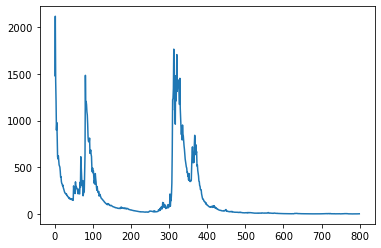

In [62]:
xc= range(800)
val_loss   = history.history['loss']
plt.plot(xc, val_loss)


In [ ]:
#lo mejor sería escoger 300

In [15]:
#MULTISTEP

In [16]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411.0,20257.0,210.517


In [19]:
seq1=data[['OrderB']]
seq2=data[['OrderC']]
seq3=data[['Non-urgent-order']]
seq1=array(seq1)
seq2=array(seq2)
seq3=array(seq3)
seq1=seq1.reshape((len(seq1),1))
seq2=seq2.reshape((len(seq2),1))
seq3=seq3.reshape((len(seq3),1))

In [21]:
dataset_m_steps=hstack((seq1,seq2,seq3))
n_step_in, n_steps_out=3,2

In [22]:
X_m_mstep,y_m_mstep=split_sequence_multistep_multivar(dataset_m_steps,n_step_in,n_steps_out)

In [26]:
for i in range (len(X_m_mstep)):
    #print (X_m_mstep[i],y_m_mstep[i] )
    pass

In [27]:
n_features=X_m_mstep.shape[2]

In [32]:
#modelo lstm:
from keras.layers import RepeatVector
from keras.layers import LSTM
model_m_mstep=Sequential()
#encoder:
model_m_mstep.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(n_step_in,n_features)))
model_m_mstep.add(LSTM(100,activation='relu'))
model_m_mstep.add(Dense(n_steps_out))
model_m_mstep.compile(optimizer='adam',loss='mse')
history=model_m_mstep.fit(X_m_mstep,y_m_mstep,epochs=1000)
#repetir el vector d contexto
model_m_mstep.add(RepeatVector(n_steps_out))


Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 33859.9180
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 33062.3008
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 32203.9590
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 31049.9180
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 29433.5195
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 27183.1484
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 23973.3809
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 19770.6543
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 14206.0684
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 9167.0898
Epoch 11/1000
2/2 [==============================] - 0s 3ms/step - loss: 6343.7144
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 7357.3047
Epoc

In [35]:
x_input=X_m_mstep[0]
x_input=x_input.reshape((1,n_step_in,n_features))
y_pred=model_m_mstep.predict(x_input)

In [36]:
y_pred

array([[[ 43.823547, 171.4573  ],
        [ 43.823547, 171.4573  ]]], dtype=float32)

In [37]:
y_m_mstep[0]

array([ 43.651, 171.297])

In [41]:
def split_sequence_multistep_multivar_parallel(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs-1
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix,:], sequence[end_ix:out_end,:]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [42]:
# multistep parallel forecasting
seq1=data[['OrderB']]
seq2=data[['OrderC']]
seq3=data[['Non-urgent-order']]
seq1=array(seq1)
seq2=array(seq2)
seq3=array(seq3)
seq1=seq1.reshape((len(seq1),1))
seq2=seq2.reshape((len(seq2),1))
seq3=seq3.reshape((len(seq3),1))
dataset_m_parallel=hstack((seq1,seq2,seq3))
n_step_in, n_steps_out=3,2
X,y=split_sequence_multistep_multivar_parallel(dataset_m_parallel,n_step_in,n_steps_out)
n_features=X.shape[2]

In [45]:
from keras.layers import TimeDistributed
#modelo lstm:
from keras.layers import RepeatVector
from keras.layers import LSTM
modelo_fore=Sequential()
#encoder:
modelo_fore.add(LSTM(100,activation='relu',input_shape=(n_step_in,n_features)))
#modelo_fore.add(LSTM(100,activation='relu'))
modelo_fore.add(RepeatVector(n_steps_out))
modelo_fore.add(LSTM(150,activation='relu',return_sequences=True))
modelo_fore.add(TimeDistributed(Dense(n_features)))
#modelo_fore.add(Dense(n_steps_out))
modelo_fore.compile(optimizer='adam',loss='mse')
history=modelo_fore.fit(X,y,epochs=1000)



Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 23068.9824
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 22620.5703
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 21988.6836
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 21158.7871
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 19939.2266
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 18160.7324
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 15773.4443
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 12913.8018
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 9407.4014
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 8103.8521
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 8563.8896
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 7808.3472
Epoch

In [46]:
x_input=X[0]
x_input=x_input.reshape((1,n_step_in,n_features))
y_pred=modelo_fore.predict(x_input)

In [49]:
y_pred

array([[[113.28871, 162.27814, 171.29468],
        [113.2857 , 162.28113, 171.29077]]], dtype=float32)

In [50]:
y[0]

array([[113.294, 162.284, 171.297]])